In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import simweights
import pickle
import os, sys
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import pandas as pd
import tables
import h5py
import math
from scipy.stats import mstats
import matplotlib as mpl
import matplotlib.font_manager as font_manager



In [3]:
sys.path.append("/data/user/tvaneede/GlobalFit/run_taupede_ftp/notebooks")
from weights import *
from utils import *
from files import files
from selections import create_selections
from fonts import *


In [4]:
# version and plotting path
version = "taupede_v5"
files = files[version]


In [7]:
main_plotting_path = f"/data/user/tvaneede/GlobalFit/run_taupede_ftp/notebooks/output/{version}"
os.system(f"mkdir -p {main_plotting_path}")

0

In [8]:
# open the files
for flavor in files:
    files[flavor]['hdf_file'] = pd.HDFStore(files[flavor]['file_path'],'r')
    files[flavor]['variables'] = get_variables( files[flavor]['hdf_file'] )
    files[flavor] = Append_Weights( files[flavor] )


In [9]:
keys_to_merge = {
    "NuE" : ["NuE_E2", "NuE_E3"],
    "NuMu" : ["NuMu_E2", "NuMu_E3"],
    "NuTau" : ["NuTau_E2", "NuTau_E3"],
    "NuAll" : ['NuE', "NuMu", "NuTau"],
}

for new_key in keys_to_merge:
    files[new_key] = {}
    files[new_key]['variables'] = {}

    for key in keys_to_merge[new_key]:
        for variable in files[key]['variables']:
            if variable not in files[new_key]['variables']:
                files[new_key]['variables'][variable] = []
            files[new_key]['variables'][variable].append( pd.Series(files[key]['variables'][variable]) )
    
    for variable in files[new_key]['variables']:
        files[new_key]['variables'][variable] = pd.concat(files[new_key]['variables'][variable])


In [10]:
from selections import create_selections

In [11]:
selections = create_selections( files["NuAll"] )

RecoETot>60TeV
TrueTrack
TrueDoubleCascade
TrueSingleCascade
Track
DoubleCascade
SingleCascade
DoubleCascade_TrueTrack
DoubleCascade_TrueDoubleCascade
DoubleCascade_TrueSingleCascade
SingleCascade_TrueTrack
SingleCascade_TrueDoubleCascade
SingleCascade_TrueSingleCascade


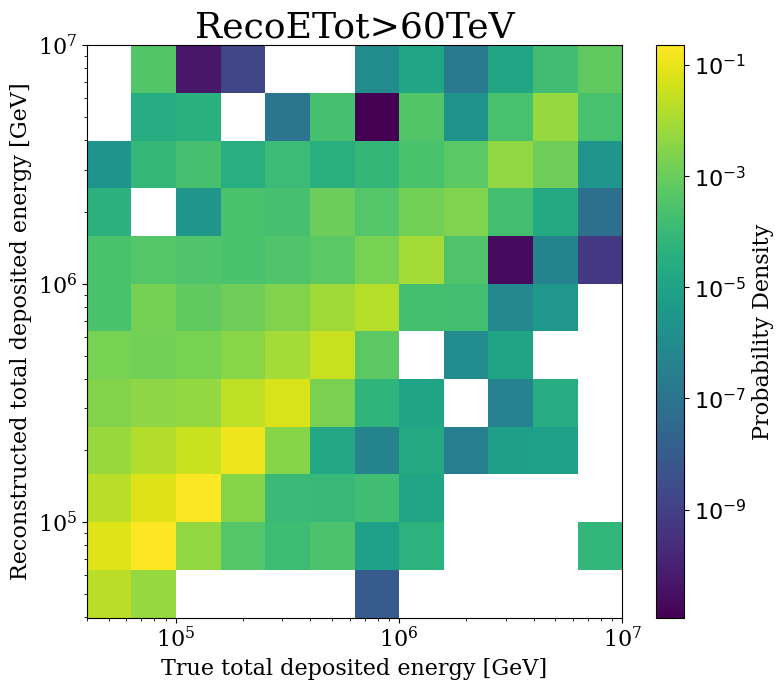

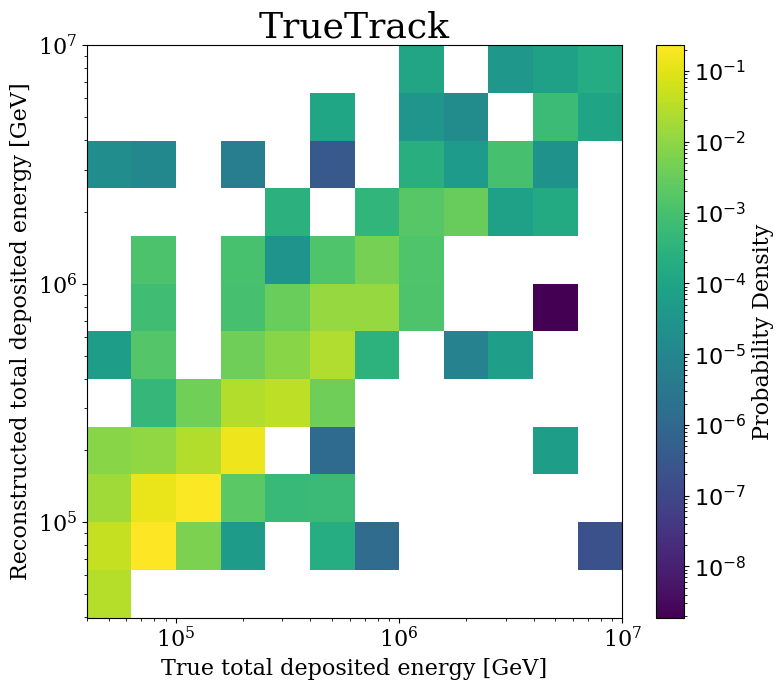

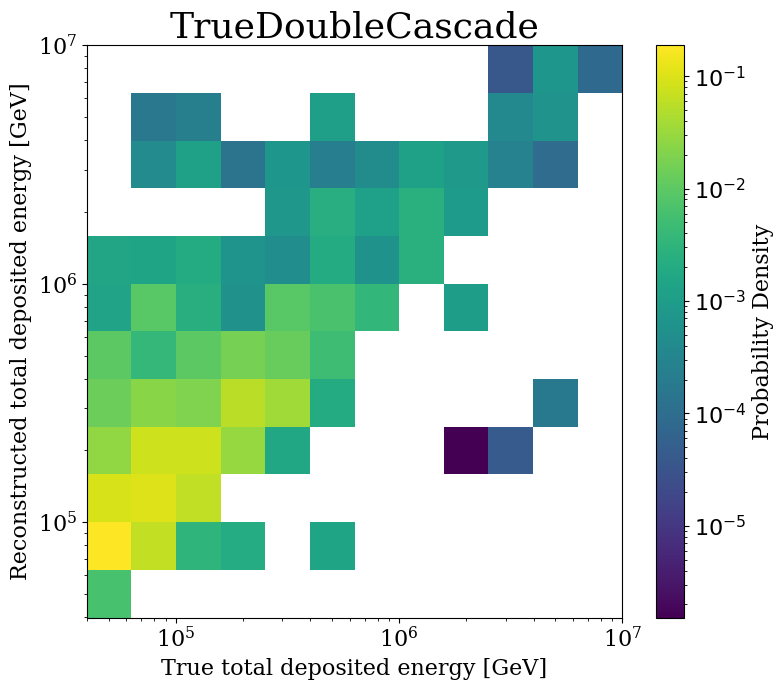

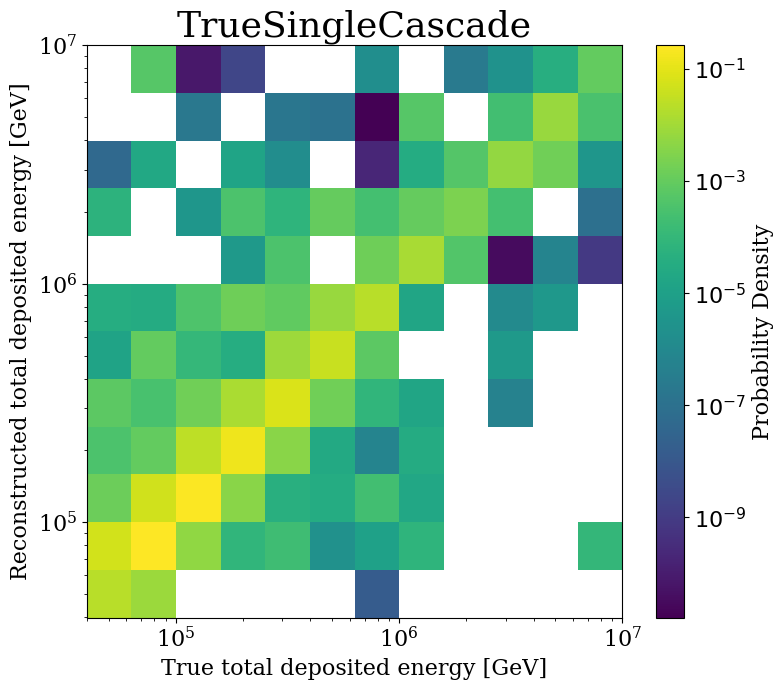

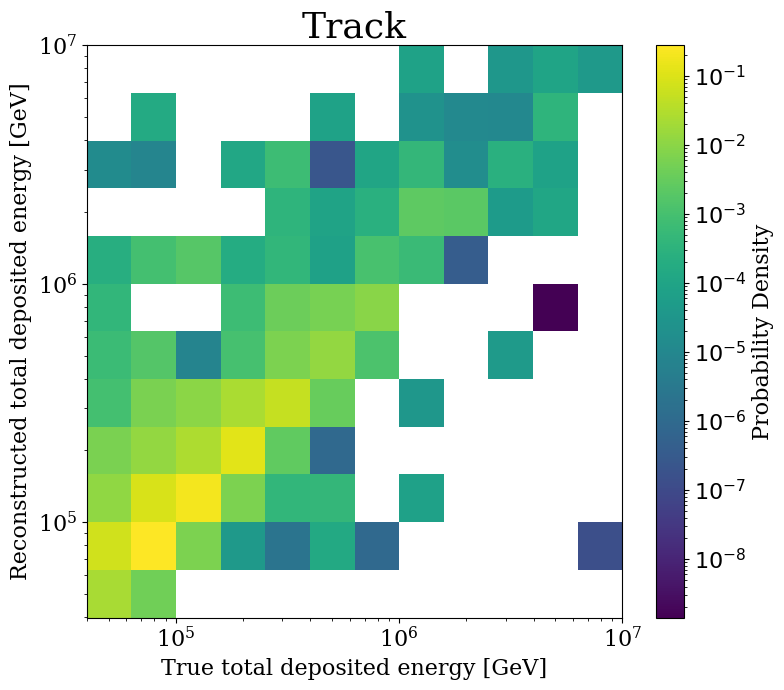

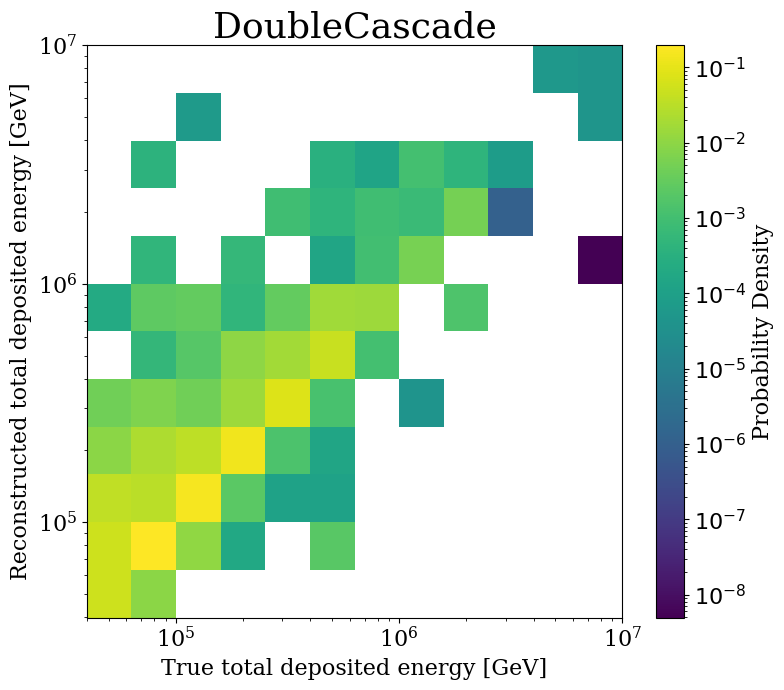

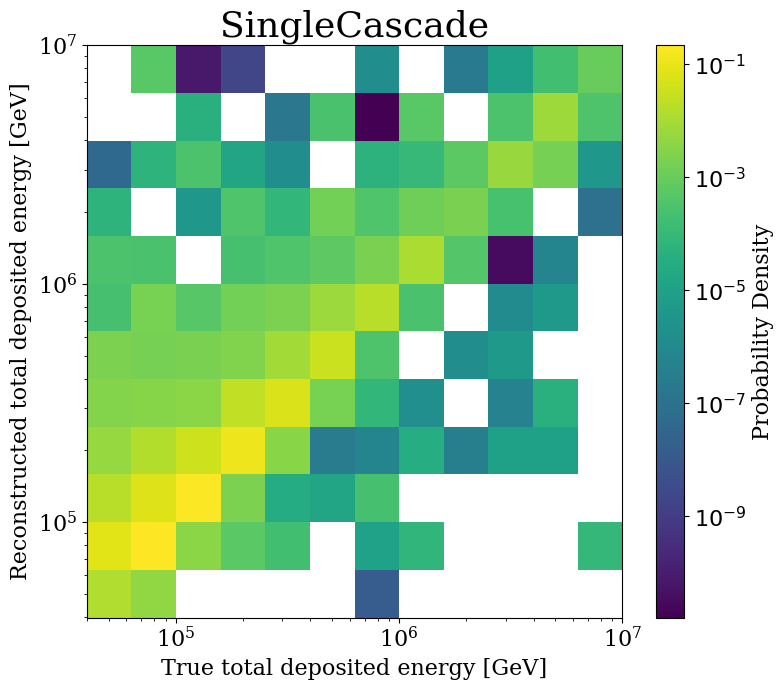

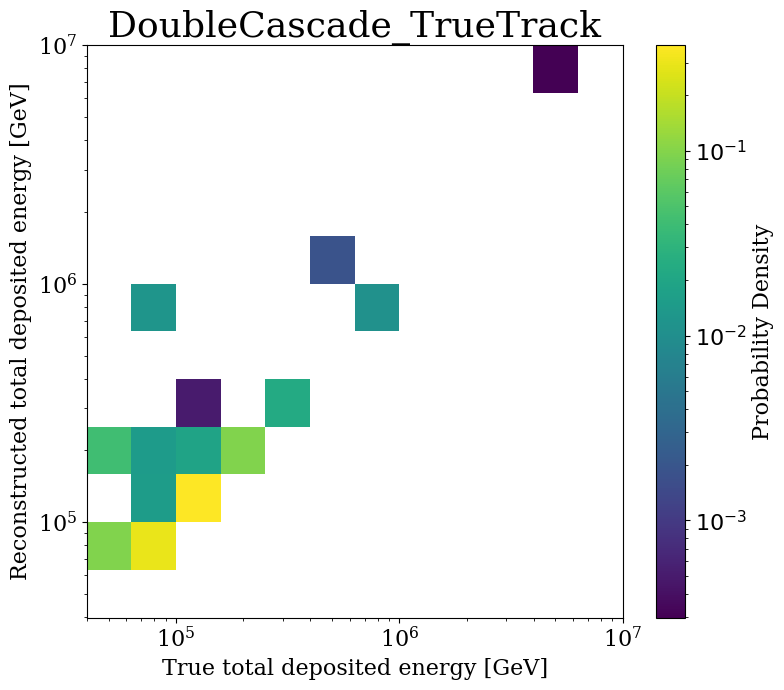

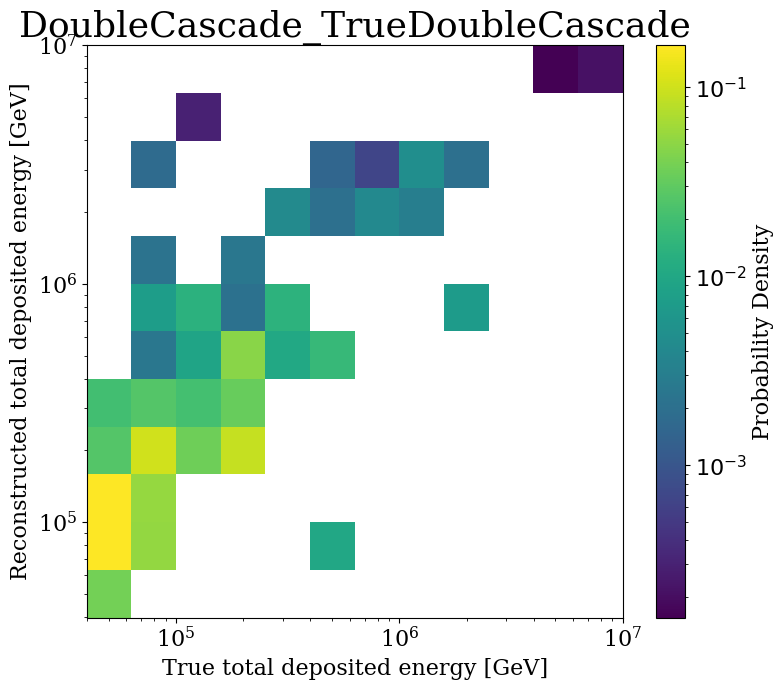

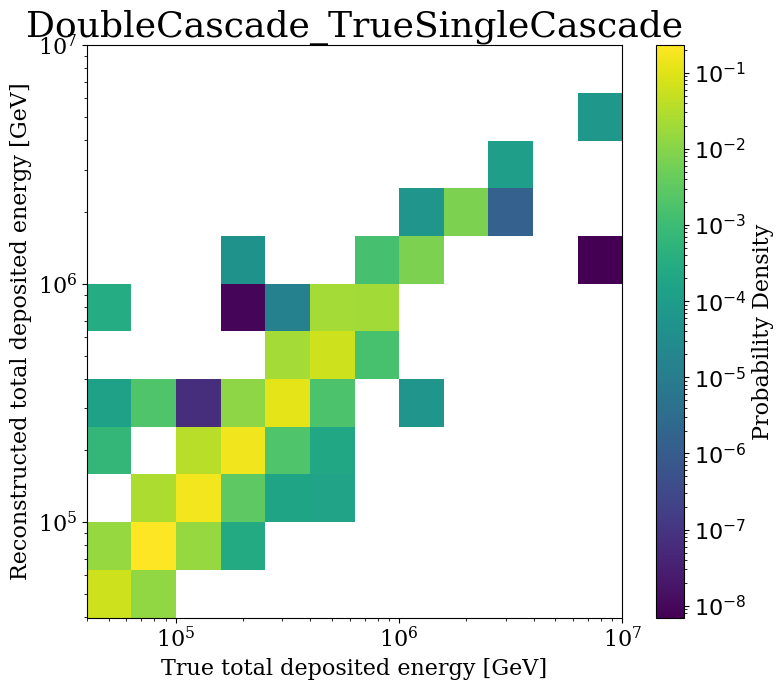

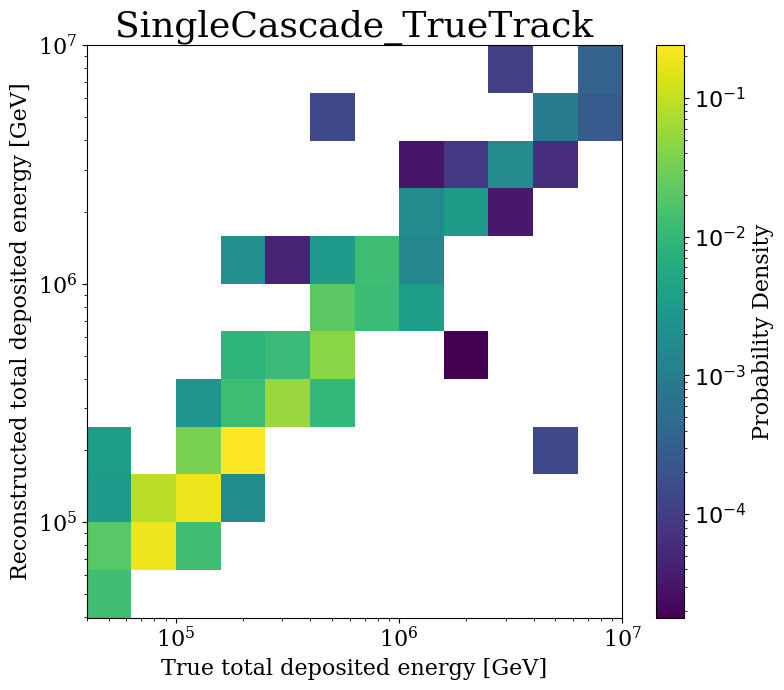

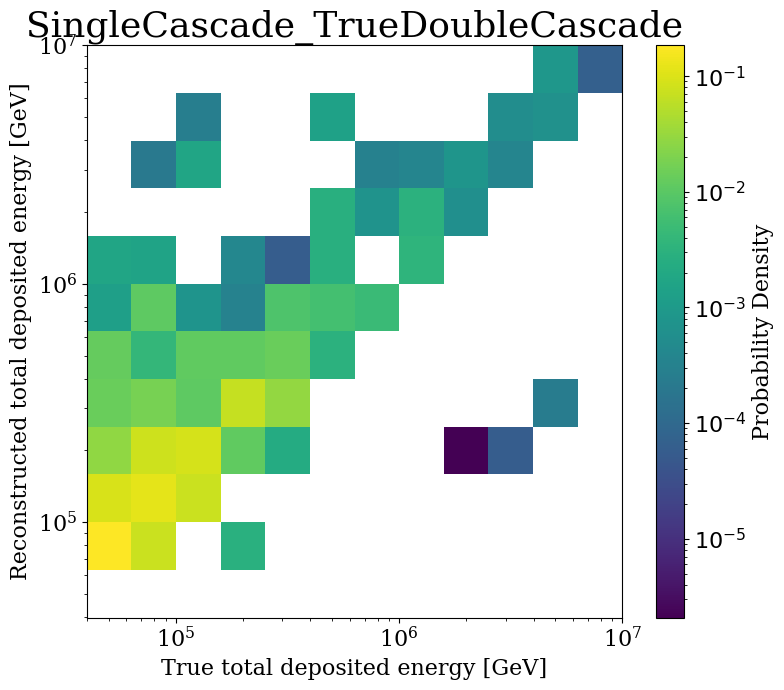

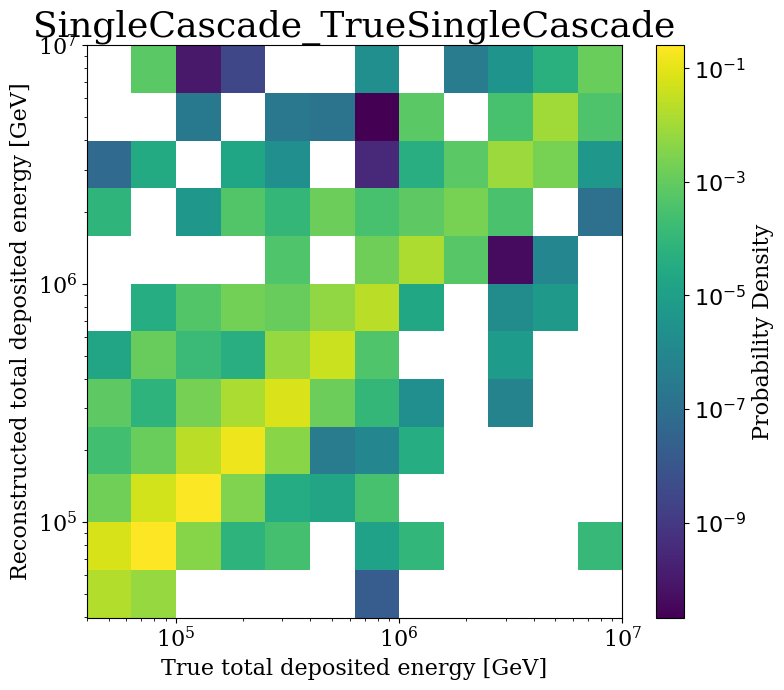

In [13]:
# RecoETot-TrueETot
for energy_variable in ["RecoETot"]:

    plotting_path = f"{main_plotting_path}/{energy_variable}-TrueETot"
    os.system(f"mkdir -p {plotting_path}")

    for selection_name,selection in selections.items():

        print(selection_name)

        fig, ax = plt.subplots(1, 1,figsize =(8,7))

        x = files['NuAll']['variables']['TrueETot'][ selection ]
        y = files['NuAll']['variables'][energy_variable][ selection ]
        w = files['NuAll']['variables']['Weights_Astro'][selection]

        clb = plot_2dHist(x=x,y=y,weights=w,
                    xbins_start=4.6,xbins_stop=7,xbins=13,
                    ybins_start=4.6,ybins_stop=7,ybins=13,
                    xlogspace=True,ylogspace=True,\
                    title=selection_name,eventcount=False,ax=ax)

        ax.set_xlabel("True total deposited energy [GeV]",fontdict=font_axis_label)
        ax.set_ylabel("Reconstructed total deposited energy [GeV]",fontdict=font_axis_label)
        clb.set_label('Probability Density', fontdict=font_axis_label)

        plt.tight_layout()
        plt.savefig(f"{plotting_path}/{energy_variable}-TrueETot_selection-{selection_name}.pdf")
    #     break
    # break
    

RecoETot>60TeV


TrueTrack
TrueDoubleCascade
TrueSingleCascade
Track
DoubleCascade
SingleCascade
DoubleCascade_TrueTrack
DoubleCascade_TrueDoubleCascade
DoubleCascade_TrueSingleCascade
SingleCascade_TrueTrack
SingleCascade_TrueDoubleCascade
SingleCascade_TrueSingleCascade


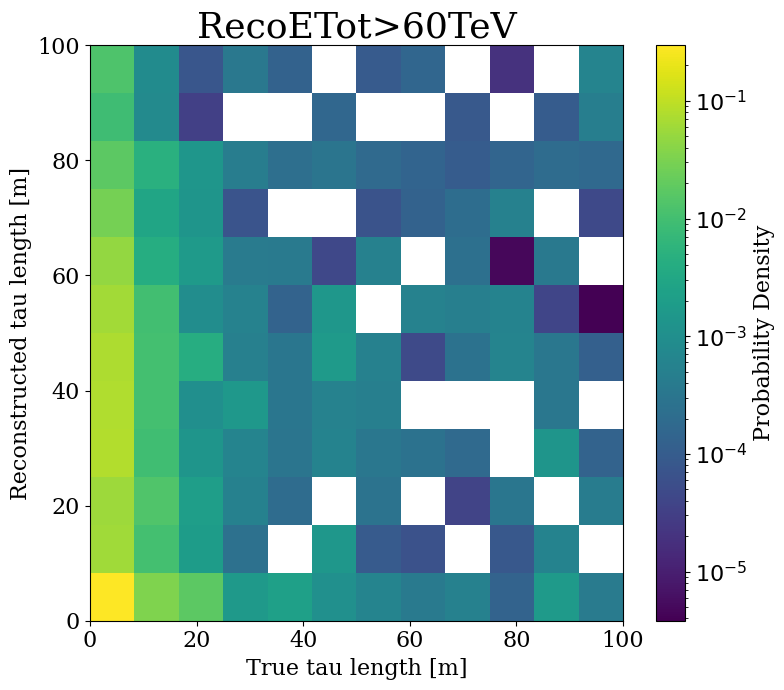

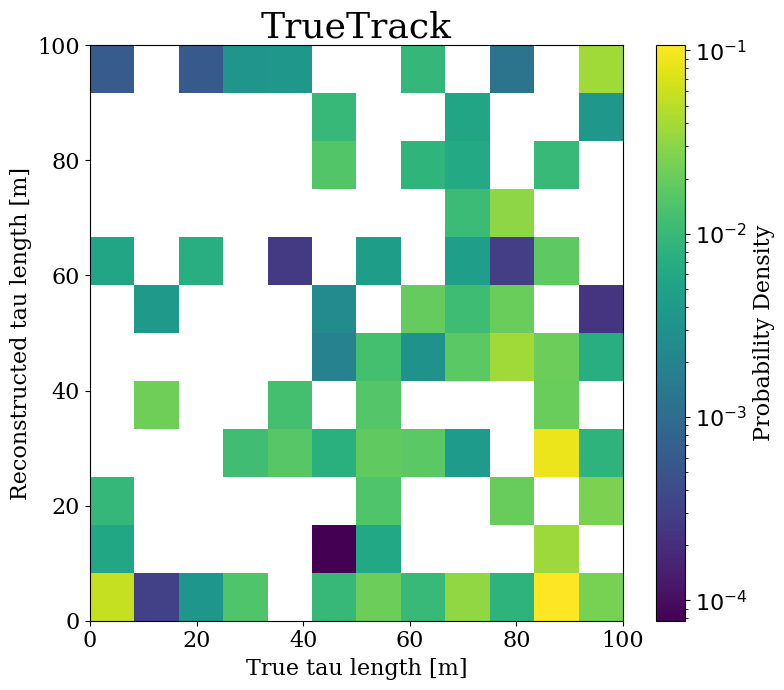

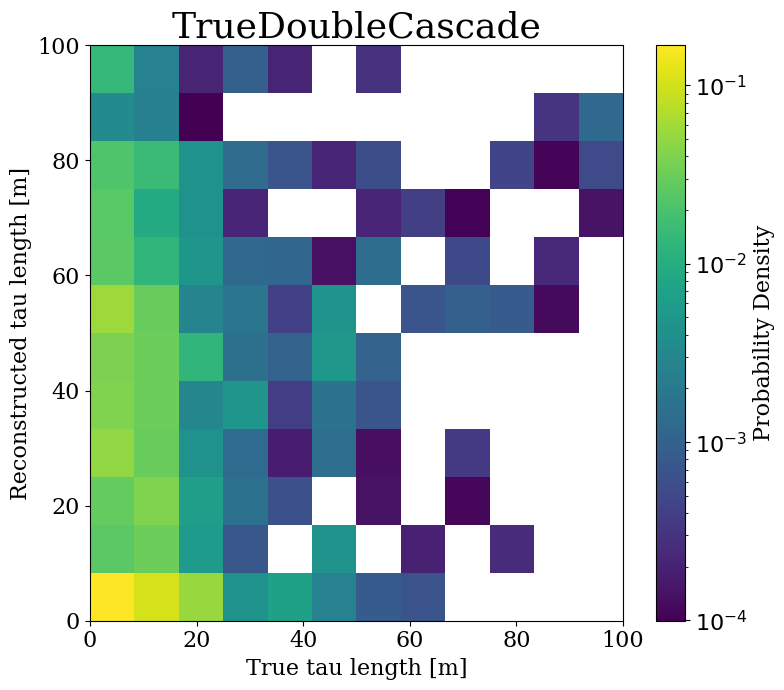

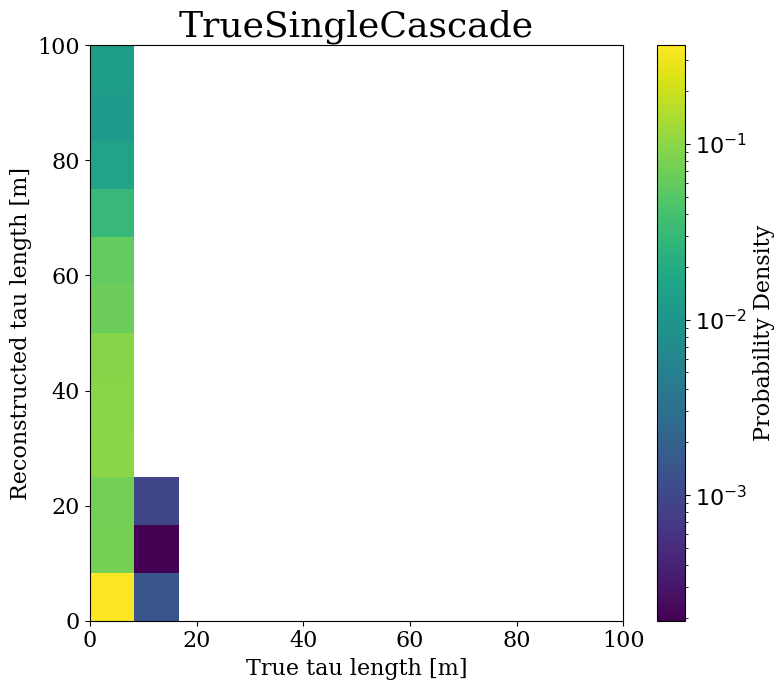

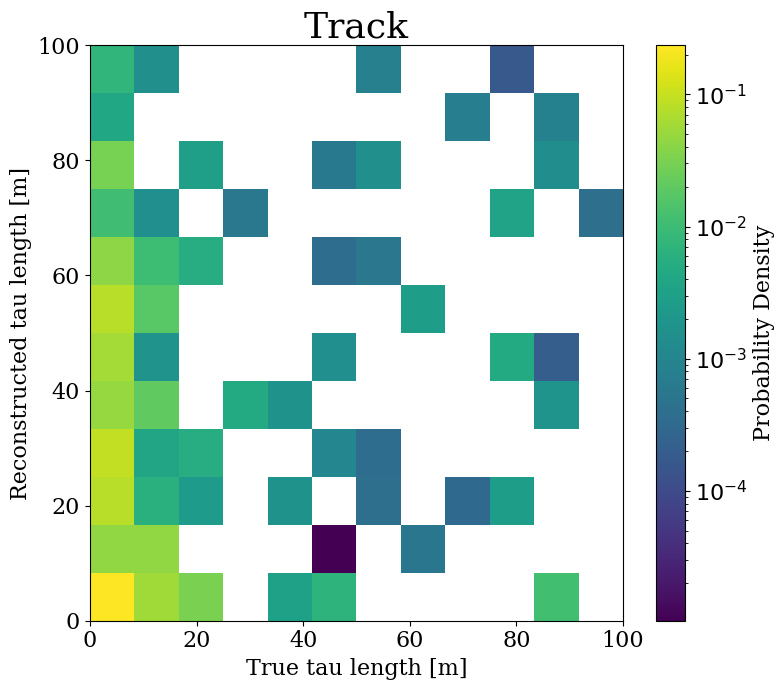

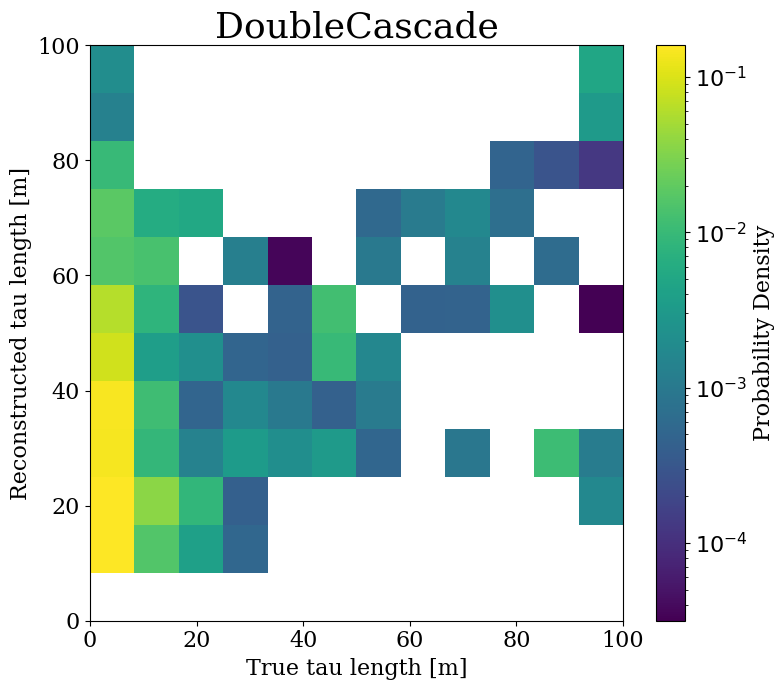

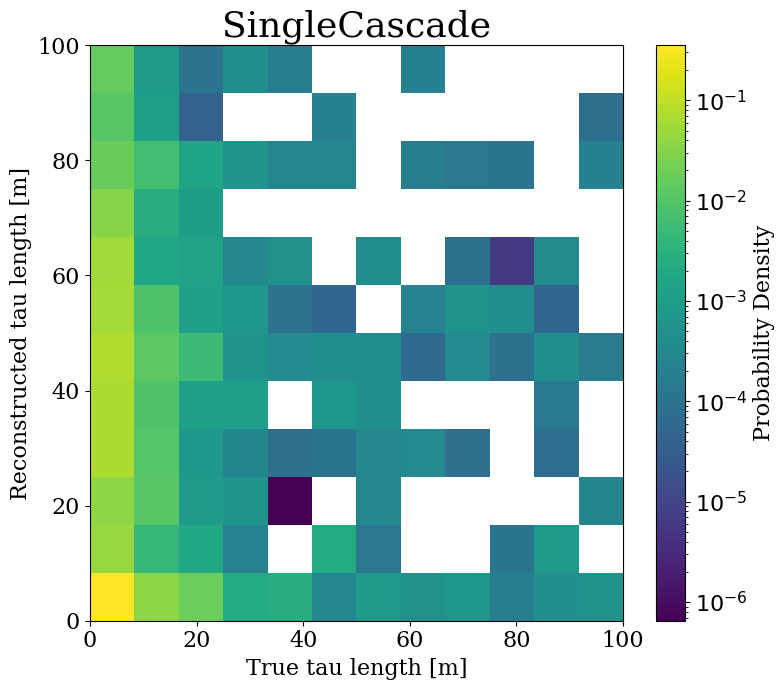

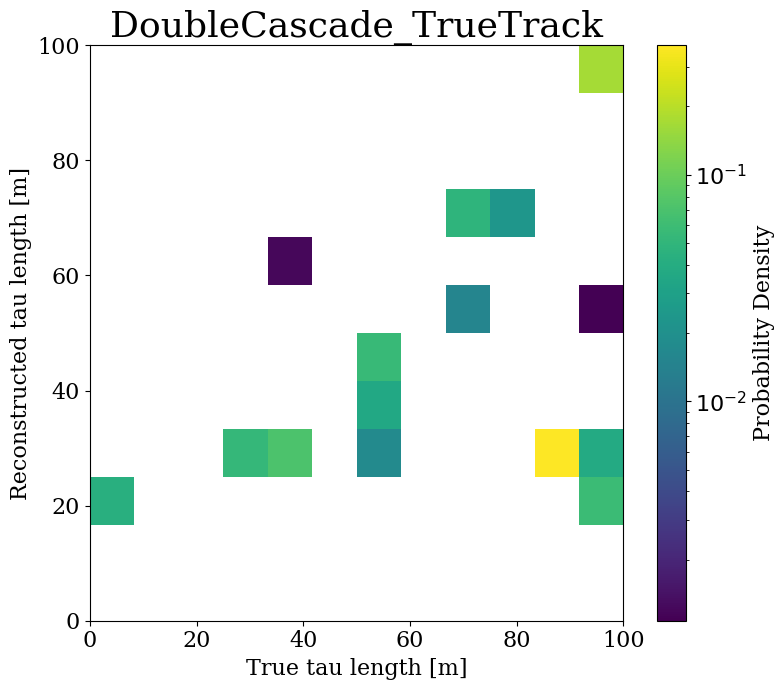

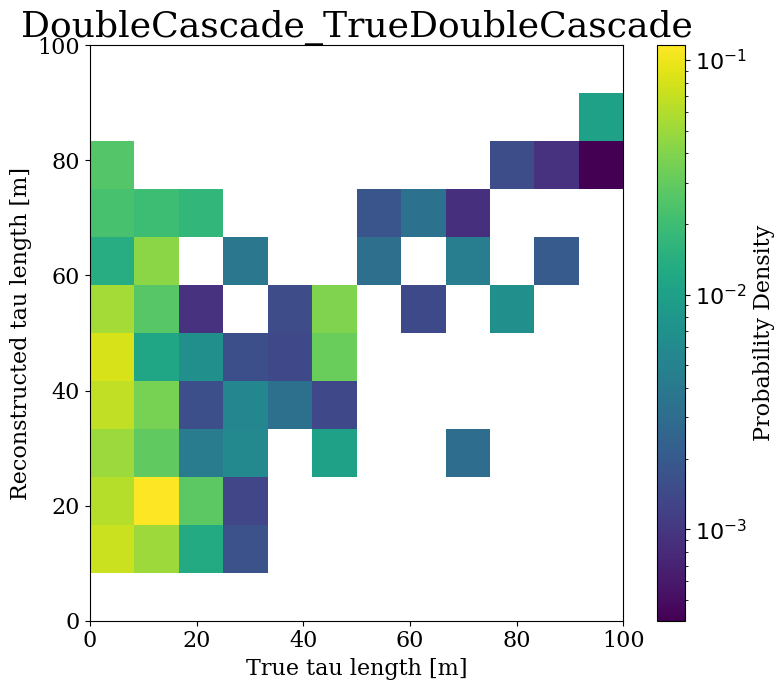

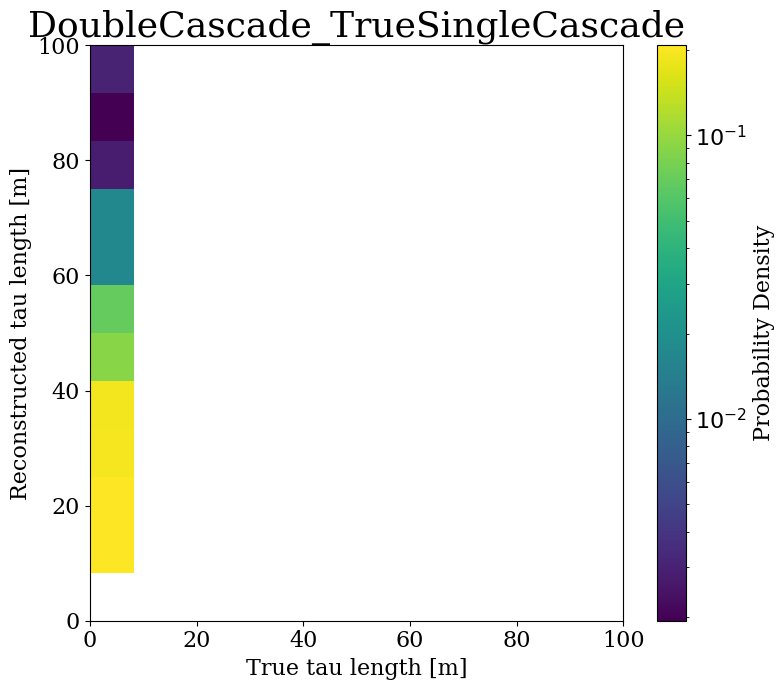

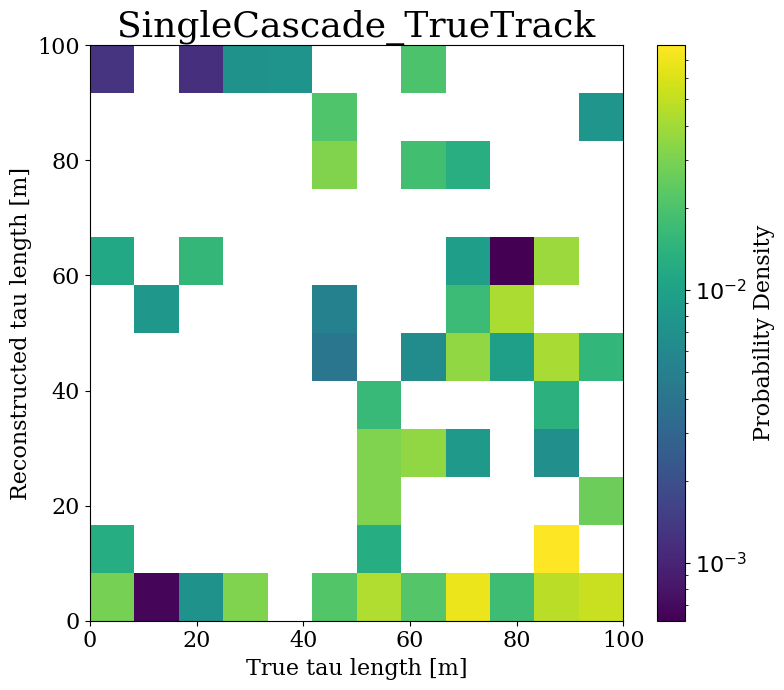

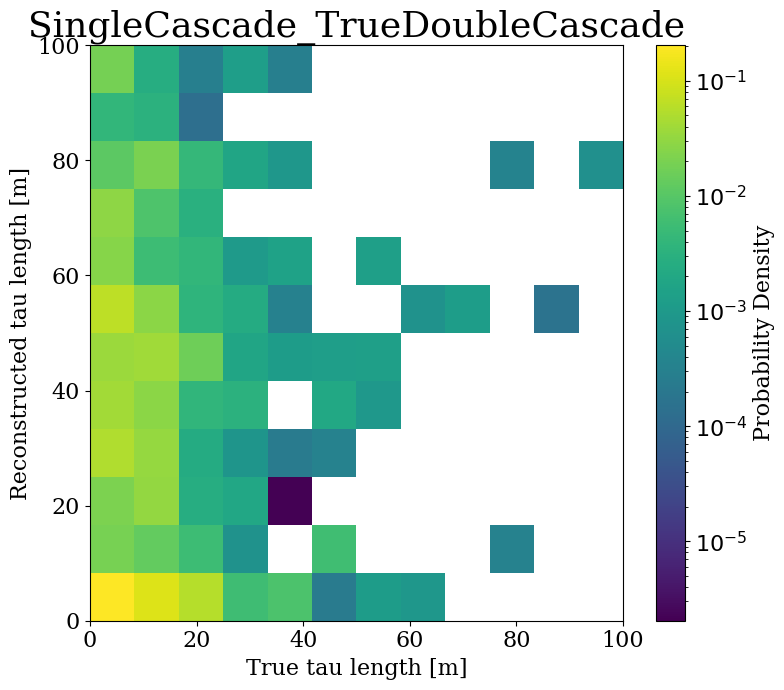

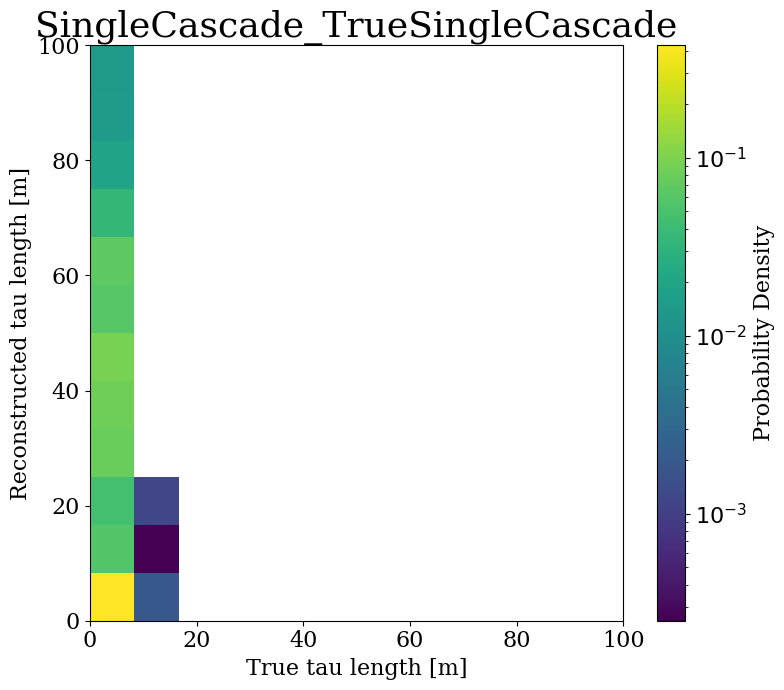

In [14]:
# RecoL-TrueL

for length_variable in ["RecoL"]:

    plotting_path = f"{main_plotting_path}/{length_variable}-TrueL"
    os.system(f"mkdir -p {plotting_path}")

    for selection_name,selection in selections.items():

        print(selection_name)

        fig, ax = plt.subplots(1, 1,figsize =(8,7))

        x = files['NuAll']['variables']['TrueL'][ selection ]
        y = files['NuAll']['variables'][length_variable][ selection ]
        w = files['NuAll']['variables']['Weights_Astro'][selection]

        clb = plot_2dHist(x=x,y=y,weights=w,
                    xbins_start=0,xbins_stop=100,xbins=13,
                    ybins_start=0,ybins_stop=100,ybins=13,
                    xlogspace=False,ylogspace=False,\
                    title= selection_name,eventcount=False,ax=ax)

        ax.set_xlabel("True tau length [m]",fontdict=font_axis_label)
        ax.set_ylabel("Reconstructed tau length [m]",fontdict=font_axis_label)
        clb.set_label('Probability Density', fontdict=font_axis_label)

        plt.tight_layout()
        plt.savefig(f"{plotting_path}/{length_variable}-TrueL_selection-{selection_name}.pdf")
    #     break
    # break


RecoETot>60TeV
TrueTrack


TrueDoubleCascade
TrueSingleCascade
Track
DoubleCascade
SingleCascade
DoubleCascade_TrueTrack
DoubleCascade_TrueDoubleCascade
DoubleCascade_TrueSingleCascade
SingleCascade_TrueTrack
SingleCascade_TrueDoubleCascade
SingleCascade_TrueSingleCascade


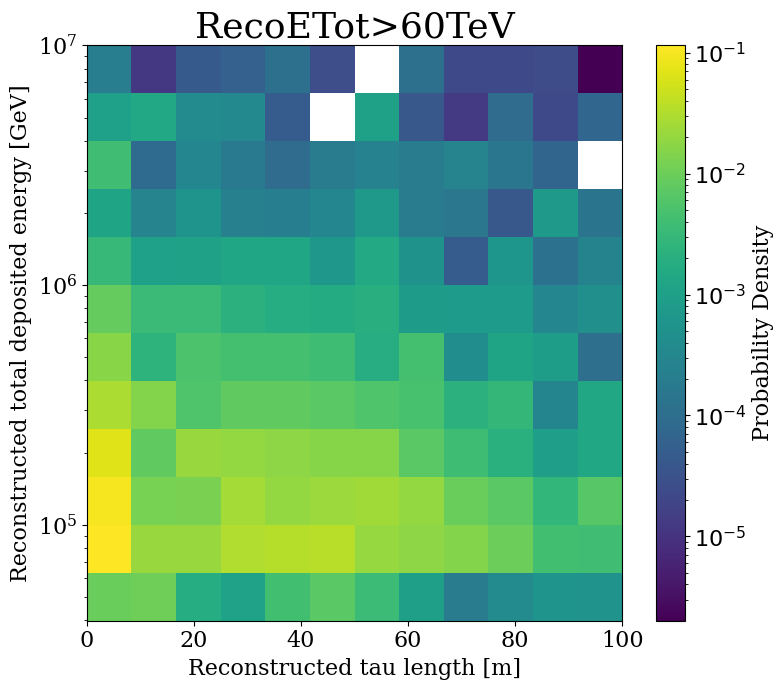

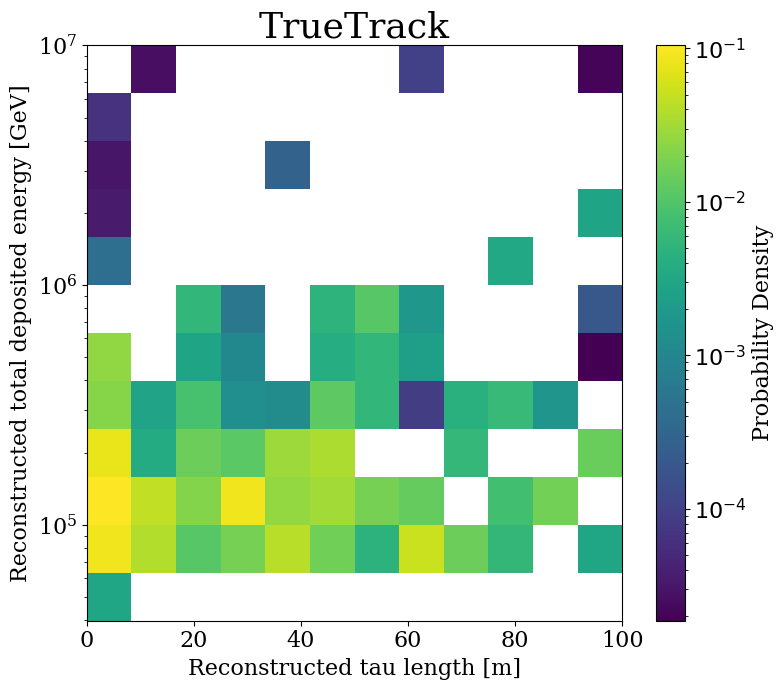

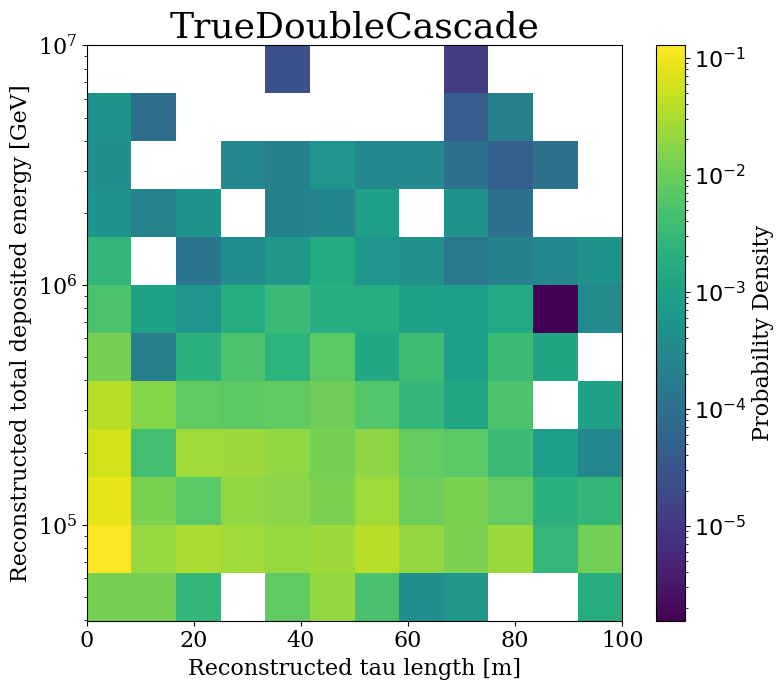

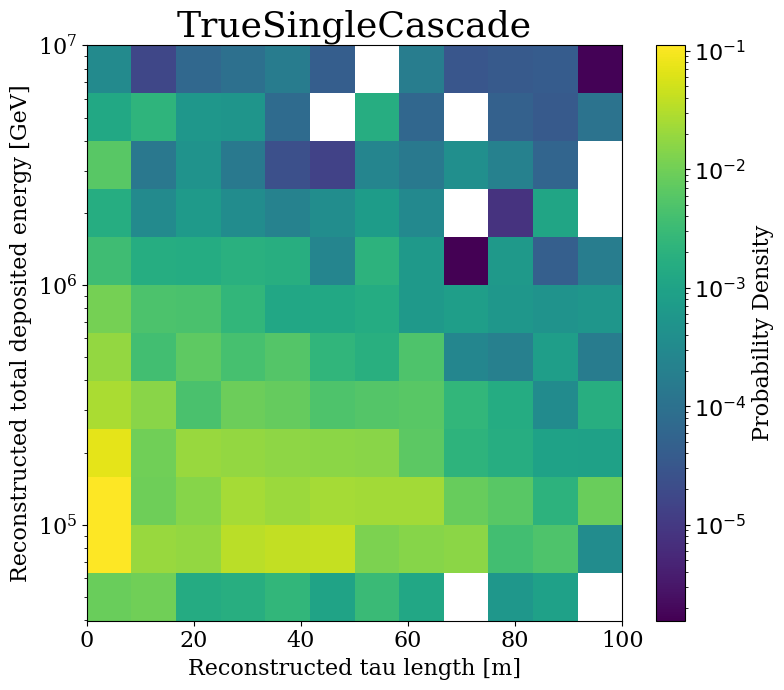

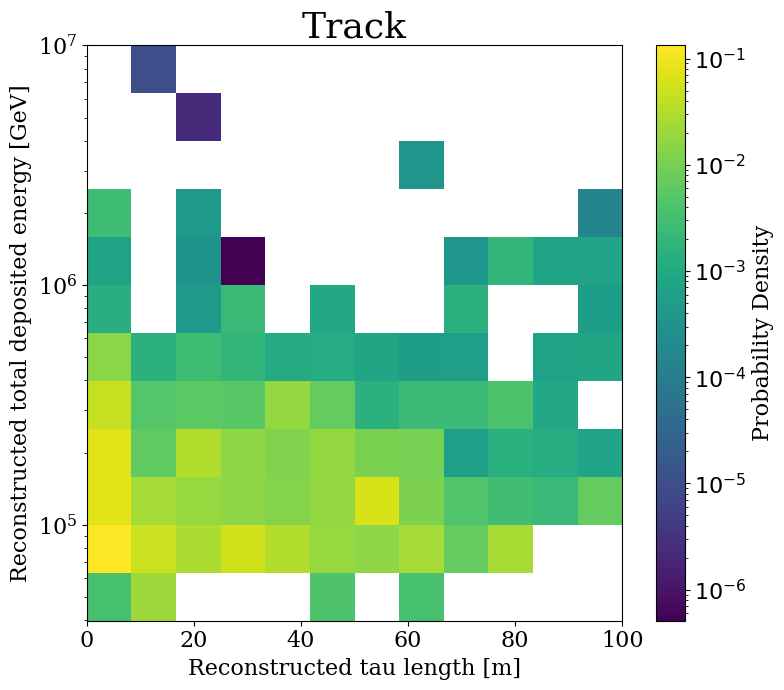

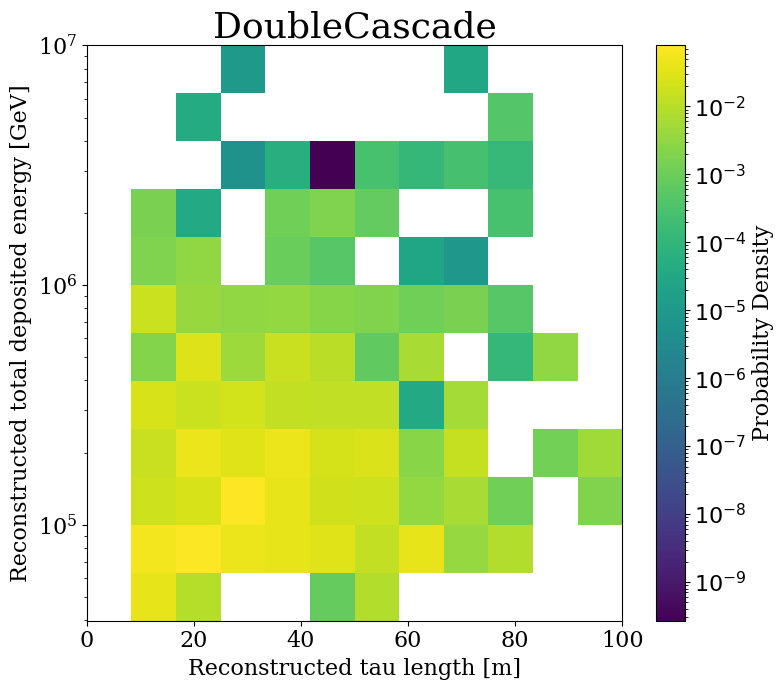

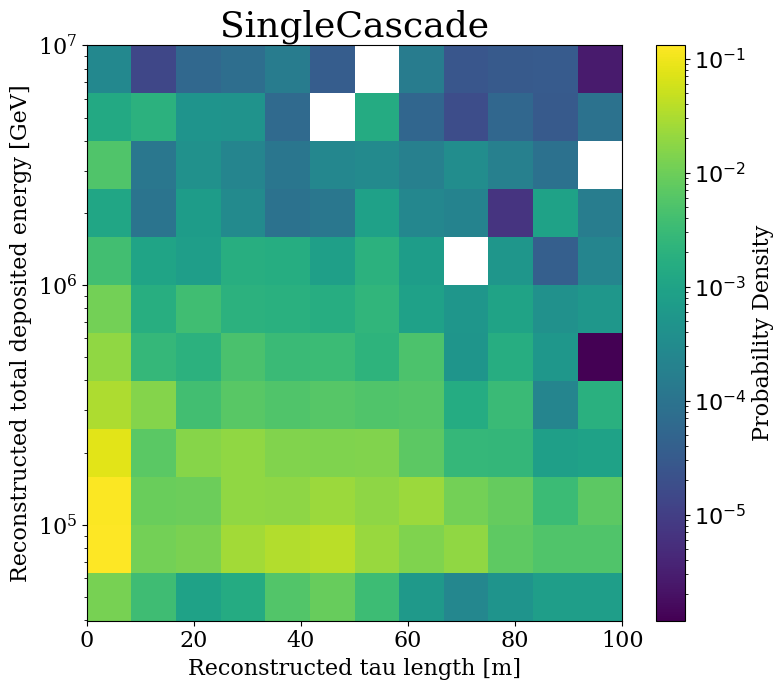

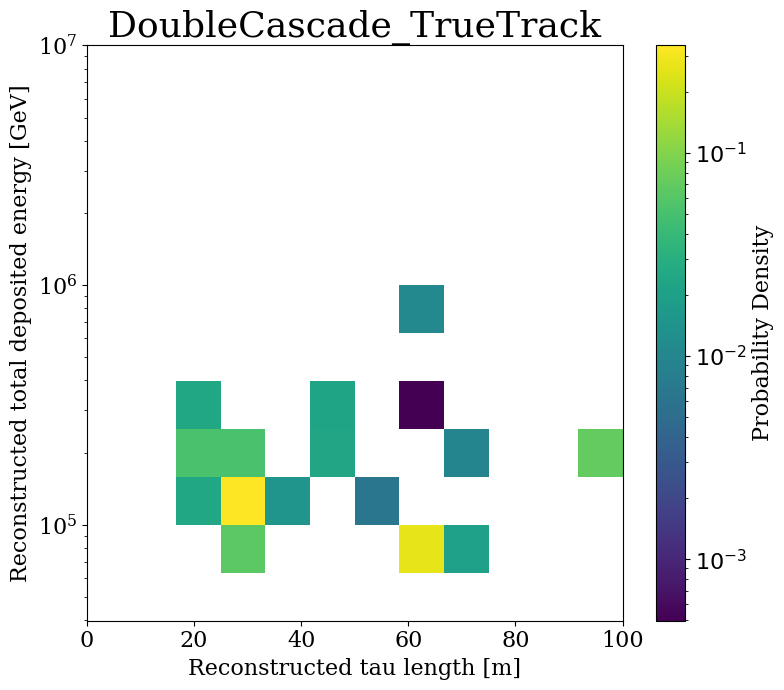

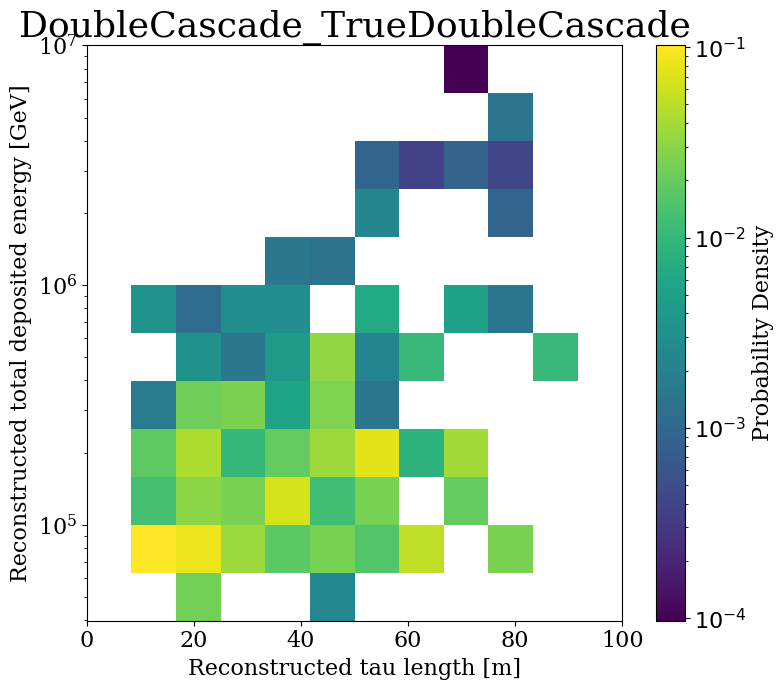

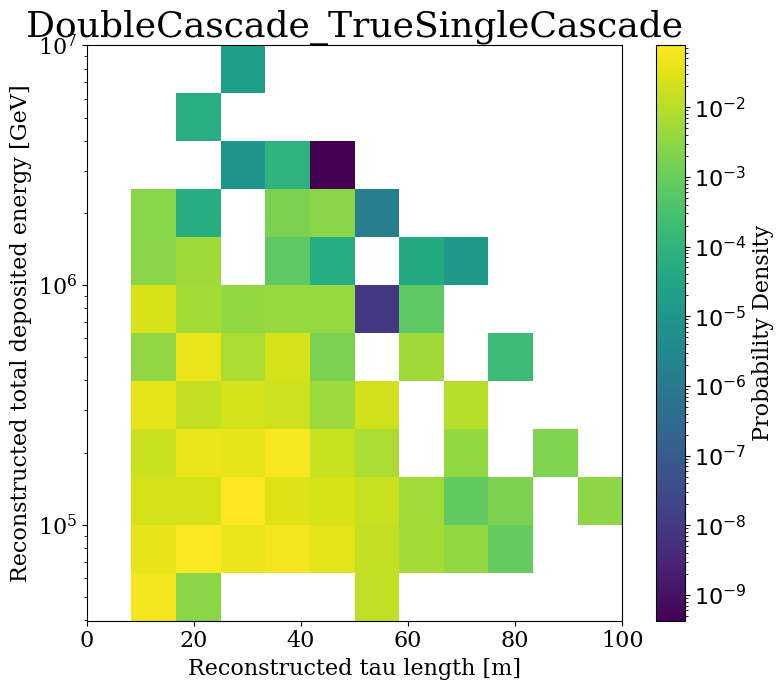

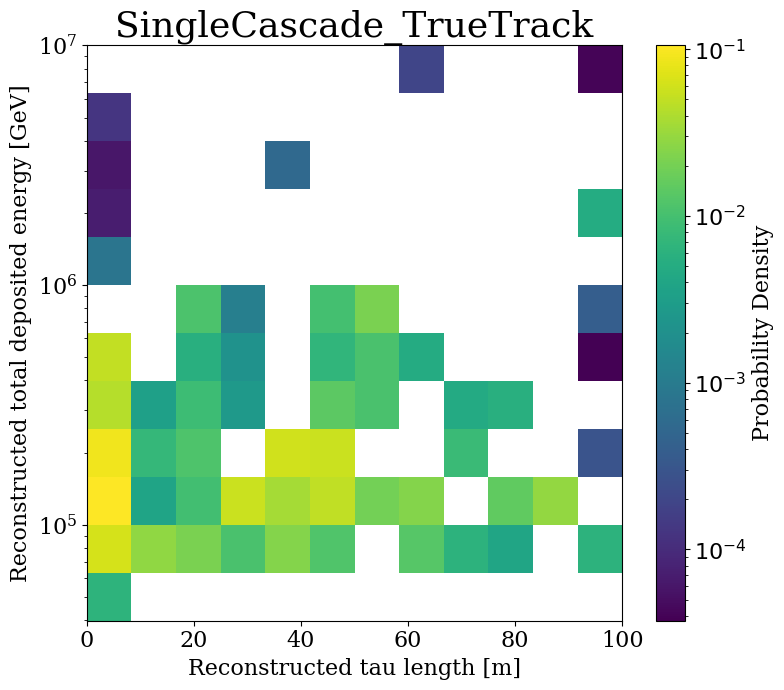

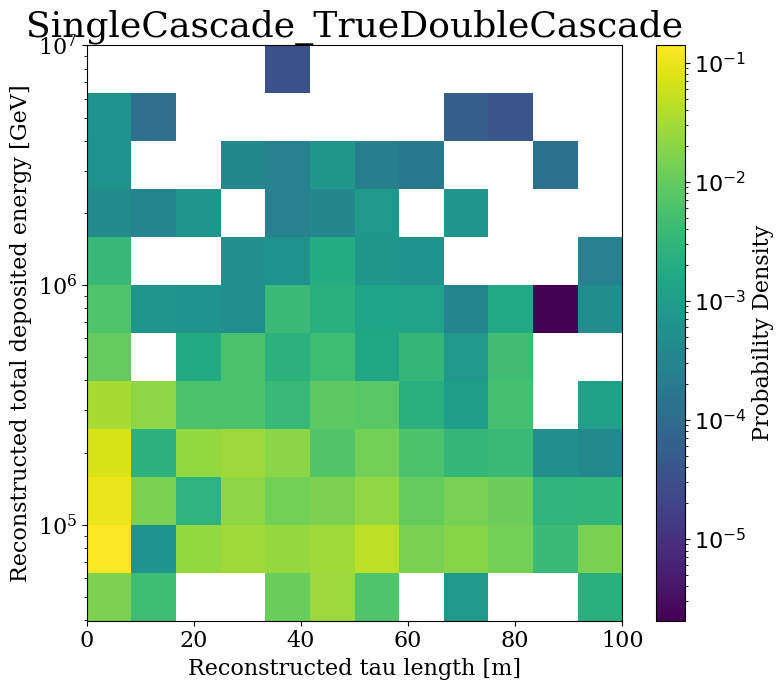

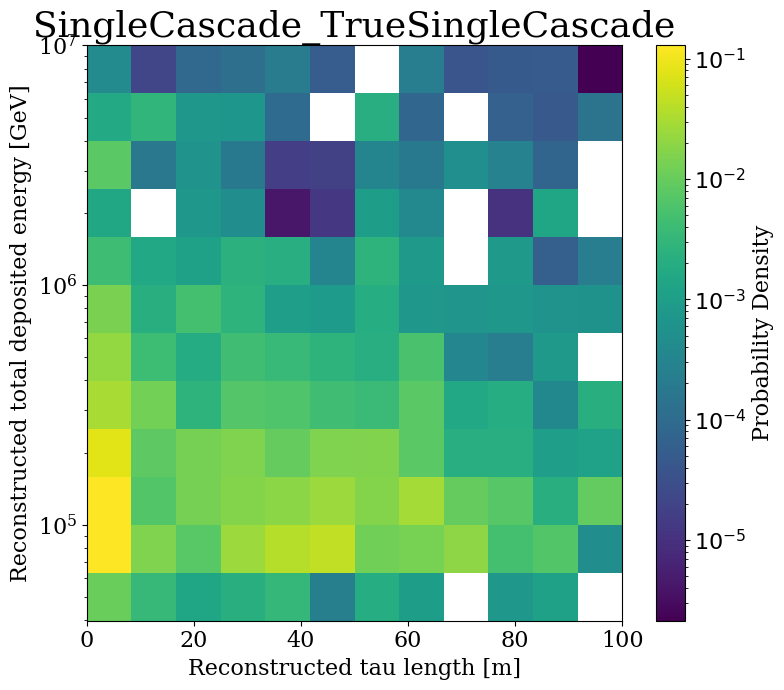

In [15]:
# RecoETot-RecoL

for length_variable in ["RecoL"]:

    plotting_path = f"{main_plotting_path}/RecoETot-{length_variable}"
    os.system(f"mkdir -p {plotting_path}")

    for selection_name,selection in selections.items():

        print(selection_name)

        fig, ax = plt.subplots(1, 1,figsize =(8,7))

        x = files['NuAll']['variables'][length_variable][ selection ]
        y = files['NuAll']['variables']['RecoETot'][ selection ]
        w = files['NuAll']['variables']['Weights_Astro'][selection]

        clb = plot_2dHist(x=x,y=y,weights=w,
                    xbins_start=0,xbins_stop=100,xbins=13,
                    ybins_start=4.6,ybins_stop=7,ybins=13,
                    xlogspace=False,ylogspace=True,\
                    title= selection_name,eventcount=False,ax=ax)

        ax.set_ylabel("Reconstructed total deposited energy [GeV]",fontdict=font_axis_label)
        ax.set_xlabel("Reconstructed tau length [m]",fontdict=font_axis_label)
        clb.set_label('Probability Density', fontdict=font_axis_label)

        plt.tight_layout()

        plt.savefig(f"{plotting_path}/RecoETot-{length_variable}_selection-{selection_name}.pdf")

    #     break
    # break